# Underwater analysis of SGBM disparity parameters

Some methods needed for analysis:

In [8]:
import numpy as np
import statistics

def read_disparity_results(paths):
    all_hole_counts = []
    all_invalid_percentage = []
    all_speckle_percentage = []
    all_incompletes = []
    all_times = []

    for i in range(len(paths)):
        with open(paths[i],mode = 'r') as file:
            csvFile = csv.reader(file)
            line_number = 0
            last_setting = "-10"
            current_holes = []
            current_invalid_percentage = []
            current_speckle_percentage = []
            current_incompletes = []
            current_times = []
            append_index = 0

            for lines in csvFile:
                if line_number != 0:
                    # get setting value
                    setting = str(lines[7])

                    if(setting != last_setting and last_setting != "-10" and i == 0):
                        all_hole_counts.append(current_holes)
                        all_invalid_percentage.append(current_invalid_percentage)
                        all_speckle_percentage.append(current_speckle_percentage)
                        all_incompletes.append(current_incompletes)
                        all_times.append(current_times)
                        current_holes = []
                        current_invalid_percentage = []
                        current_speckle_percentage = []
                        current_incompletes = []
                        current_times = []
                        
                        current_holes.append(float(lines[2]))
                        current_invalid_percentage.append(float(lines[3]))
                        current_speckle_percentage.append(float(lines[4]))
                        current_incompletes.append(float(lines[5]))
                        current_times.append(float(lines[6]))
                        
                    elif(setting != last_setting and last_setting != "-10"):
                        append_index = append_index+1
                        all_hole_counts[append_index].append(float(lines[2]))
                        all_invalid_percentage[append_index].append(float(lines[3]))
                        all_speckle_percentage[append_index].append(float(lines[4]))
                        all_incompletes[append_index].append(float(lines[5]))
                        all_times[append_index].append(float(lines[6]))
                        
                    elif(i == 0):
                        current_holes.append(float(lines[2]))
                        current_invalid_percentage.append(float(lines[3]))
                        current_speckle_percentage.append(float(lines[4]))
                        current_incompletes.append(float(lines[5]))
                        current_times.append(float(lines[6]))
                    else:
                        all_hole_counts[append_index].append(float(lines[2]))
                        all_invalid_percentage[append_index].append(float(lines[3]))
                        all_speckle_percentage[append_index].append(float(lines[4]))
                        all_incompletes[append_index].append(float(lines[5]))
                        all_times[append_index].append(float(lines[6]))
                    last_setting = setting
                line_number = line_number+1
            if(i == 0):
                all_hole_counts.append(current_holes)
                all_invalid_percentage.append(current_invalid_percentage)
                all_speckle_percentage.append(current_speckle_percentage)
                all_incompletes.append(current_incompletes)
                all_times.append(current_times)
    return all_hole_counts, all_invalid_percentage, all_speckle_percentage,all_incompletes,all_times

def line_graph_median_and_quantiles(x_values,medians,percentiles_25,percentiles_75,labels, use_log, x_label, y_label, title, save, colors,save_title=""):

    plt.rcParams.update({'font.size': 28})
    plt.rcParams["figure.figsize"] = (13,10)
    lw = 3
    if(use_log == True):
        plt.xscale("log")

    for i in range(len(medians)):
        plt.plot(x_values,medians[i],marker='.', markersize=20,color=colors[i],label=labels[i],linewidth=lw)
        plt.fill_between(x_values, percentiles_25[i],percentiles_75[i], alpha=0.2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if(len(medians) > 1):
        plt.legend()
    if(save == True):
        plt.savefig(save_title)#,bbox_inches='tight')
    plt.show()

def find_median_and_quartiles(environment_data, start = 0):
    medians = []
    percentiles_25 = []
    percentiles_75 = []
    
    for i in range(len(environment_data)):
        temp_medians = []
        temp_percentiles_25 = []
        temp_percentiles_75 = []

        for j in range(start,len(environment_data[0])):
            if(len(environment_data[i][j]) == 0):
                temp_medians.append(0)
                temp_percentiles_25.append(0)
                temp_percentiles_75.append(0)
            else:    
                temp_medians.append(statistics.median(environment_data[i][j]))
                temp_percentiles_25.append(np.percentile(environment_data[i][j], 25))
                temp_percentiles_75.append(np.percentile(environment_data[i][j], 75))
        medians.append(temp_medians)
        percentiles_25.append(temp_percentiles_25)
        percentiles_75.append(temp_percentiles_75)
        
    return medians, percentiles_25, percentiles_75

def show_double_grouped_boxplots(upper_group,settings, input_data, colors, setting_name, y_label,title,save = False,save_title=""):
    groups = []
    plt.rcParams.update({'font.size': 25})
    plt.rcParams["figure.figsize"] = (16,10)
    lw = 3
    for i in range(len(upper_group)):
        dictionary = {}
        for j in range(len(settings)):
            print(settings[j])
            #print("Median: " statistics.median(input_data[i][j]))
            print("Quantiles: ")
            print(np.quantile(input_data[i][j],[0.25,0.5,0.75]))
            
            dictionary.update({settings[j]:input_data[i][j]})
        temp_dataframe = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in dictionary.items() ]))
        groups.append(temp_dataframe)

    x_range = 0
    x_position = 0
    if(len(groups) > 1):
        x_range = np.arange(len(groups)) / (len(groups)-1)
        x_position = (x_range*0.5)+0.75

    plt.grid(zorder=0)
    for i,data in enumerate(groups):
        temp_data = np.array(data)
        temp_data = [np.nan_to_num(group,nan=np.nanmean(group)) for group in temp_data]
        if(len(groups) > 1):
            current_plot = plt.boxplot(np.array(temp_data),sym='',whis=[0,100],widths=0.6/len(groups),tick_labels=list(groups[0]),vert=False,zorder=3,patch_artist=True,positions=[x_position[i]+j*1 for j in range(len(data.T))])
        else:
            current_plot = plt.boxplot(np.array(temp_data),sym='',whis=[0,100],widths=0.6/len(groups),tick_labels=list(groups[0]),vert=False,zorder=3,patch_artist=True)
            
        k = i % len(colors)
        for box in current_plot['boxes']:
            box.set(facecolor=colors[k])
        for element in ['fliers','means','medians']:
            plt.setp(current_plot[element],color='black')
        for element in ['whiskers','caps']:
            plt.setp(current_plot[element],color = 'black')
            plt.setp(current_plot[element],color = 'black')

    
    legend_titles = []
    for i in range(len(groups)):
        j = i % len(upper_group)
        k = i % len(colors)
        legend_titles.append(Patch(facecolor=colors[k], label=upper_group[j]))
    if(len(groups) > 1):
        plt.legend(handles=legend_titles, fontsize=8)
    plt.xlabel(y_label) #plt.xlabel(setting_name)
    #plt.xticks(np.arange(len(list(groups[0])))+1,rotation=30)
    plt.ylabel(setting_name)
    plt.title(title)
    #plt.xlim([0.5, len(list(groups[0])) + 0.5])
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.subplots_adjust(left=0.2, right=0.9)
    if(save == True):
        plt.savefig(save_title,bbox_inches='tight')
    plt.show()

# Postprocessing

In [11]:
import csv

# Paths
paths_single = ["None.csv","Consistensy.csv", "Speckle.csv","median.csv","Weighted_median.csv","billateral.csv","fast_billateral.csv","wls.csv","fill.csv","fill_hoz.csv", "inpaint.csv"]
paths_combined = [ "Consistensy_weighted_median.csv", "Consistensy_speckle.csv", "Weighted_median_speckle.csv","All.csv"]

# Other variables
settings_single = ["None", "Consistensy check", "Speckle filter", "Median filter", "Weighted median filter", "Billateral filter", "Fast billateral solver", "WLS filter", "Proximity filling", "Horizontal filling", "Inpainting"]
settings_combined = ["Consistensy and weighted median", "Consistensy and speckle", "Weighted median and speckle", "All"]

# Extract desired information
single_hole_counts = []
single_invalid_percentages = []
single_incomplete_count = []
single_consistensy_level = []
single_execution_time = []

for i in range(len(paths_single)):
    temp_hole_counts, temp_invalid_percentages, temp_incomplete_count, temp_consistensy_level,temp_execution_times = read_disparity_results([paths_single[i]])
    single_hole_counts.append(temp_hole_counts[0])
    single_invalid_percentages.append(temp_invalid_percentages[0])
    single_incomplete_count.append(temp_incomplete_count[0])
    single_consistensy_level.append(temp_consistensy_level[0])
    single_execution_time.append(temp_execution_times[0])


combined_hole_counts = []
combined_invalid_percentages = []
combined_incomplete_count = []
combined_consistensy_level = []
combined_execution_time = []

for i in range(len(paths_combined)):
    temp_hole_counts, temp_invalid_percentages, temp_incomplete_count, temp_consistensy_level,temp_execution_times = read_disparity_results([paths_combined[i]])
    combined_hole_counts.append(temp_hole_counts[0])
    combined_invalid_percentages.append(temp_invalid_percentages[0])
    combined_incomplete_count.append(temp_incomplete_count[0])
    combined_consistensy_level.append(temp_consistensy_level[0])
    combined_execution_time.append(temp_execution_times[0])

None
Quantiles: 
[315.25 327.   343.75]
Consistensy check
Quantiles: 
[328.25 341.   356.  ]
Speckle filter
Quantiles: 
[267.5  286.   300.75]
Median filter
Quantiles: 
[5. 6. 7.]
Weighted median filter
Quantiles: 
[14.   18.   20.75]
Billateral filter
Quantiles: 
[6.   7.   8.75]
Fast billateral solver
Quantiles: 
[26.25 30.   36.5 ]
WLS filter
Quantiles: 
[0. 0. 0.]
Proximity filling
Quantiles: 
[5.25 6.   8.  ]
Horizontal filling
Quantiles: 
[5.   6.   7.75]


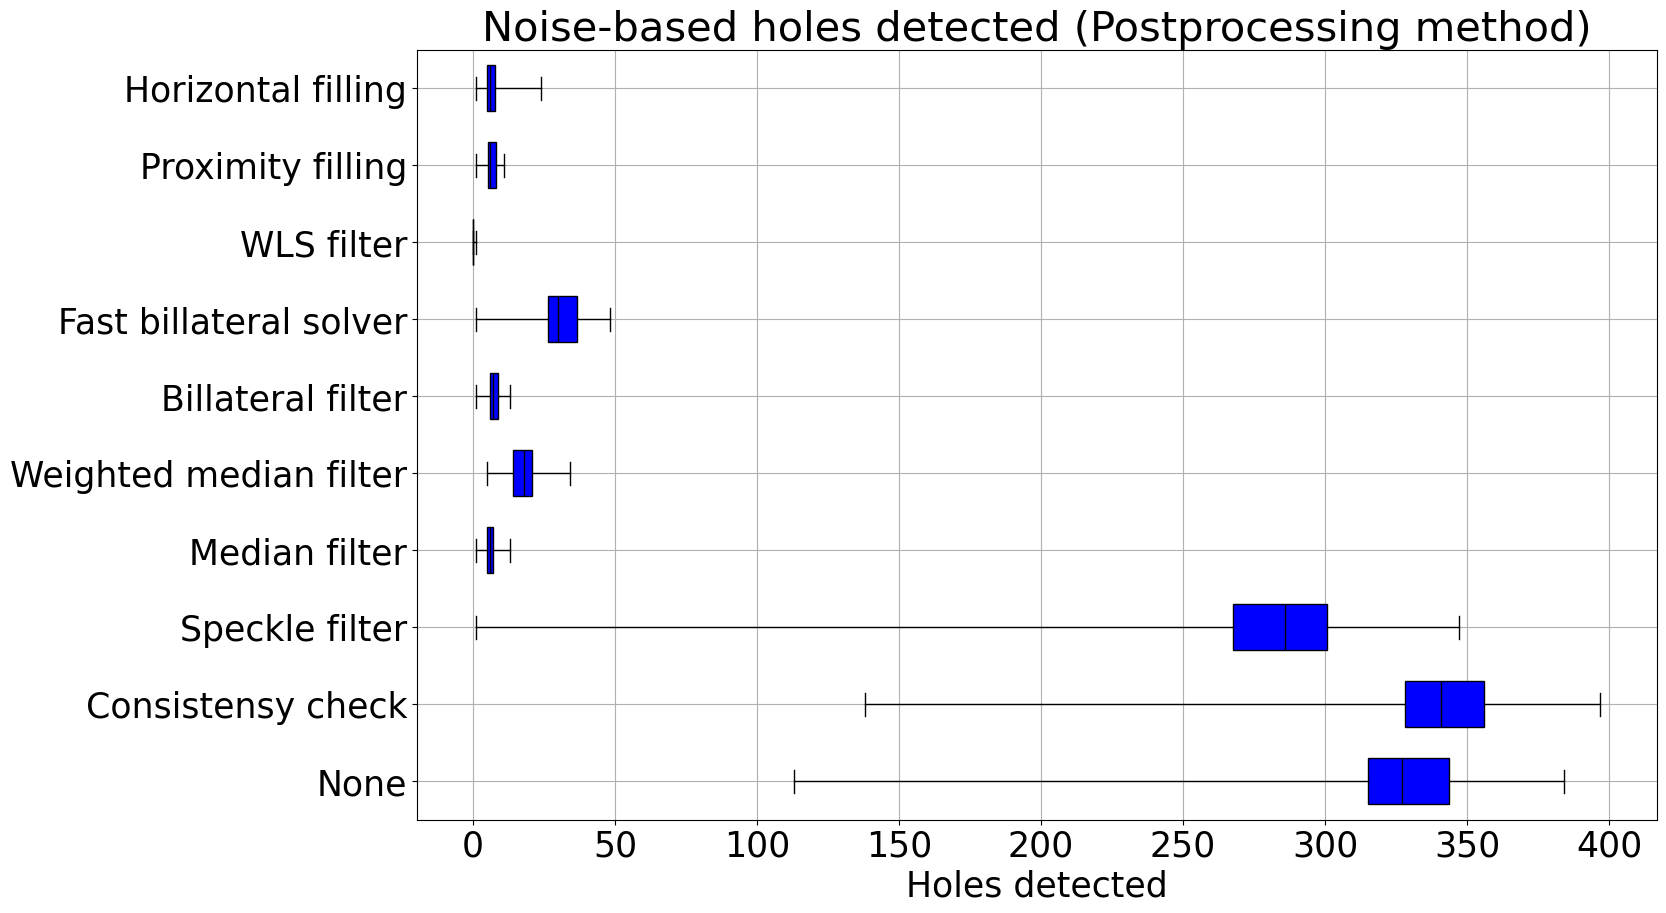

None
Quantiles: 
[26.35725  27.1439   28.830425]
Consistensy check
Quantiles: 
[26.454975 27.27345  28.943225]
Speckle filter
Quantiles: 
[33.65525 34.12125 35.93875]
Median filter
Quantiles: 
[31.434875 31.97925  33.40375 ]
Weighted median filter
Quantiles: 
[23.662575 24.8899   25.914725]
Billateral filter
Quantiles: 
[24.130725 24.98435  26.21335 ]
Fast billateral solver
Quantiles: 
[12.186775 13.5368   14.271175]
WLS filter
Quantiles: 
[0. 0. 0.]
Proximity filling
Quantiles: 
[18.406    19.34515  20.721575]
Horizontal filling
Quantiles: 
[28.60645  29.5412   30.584375]


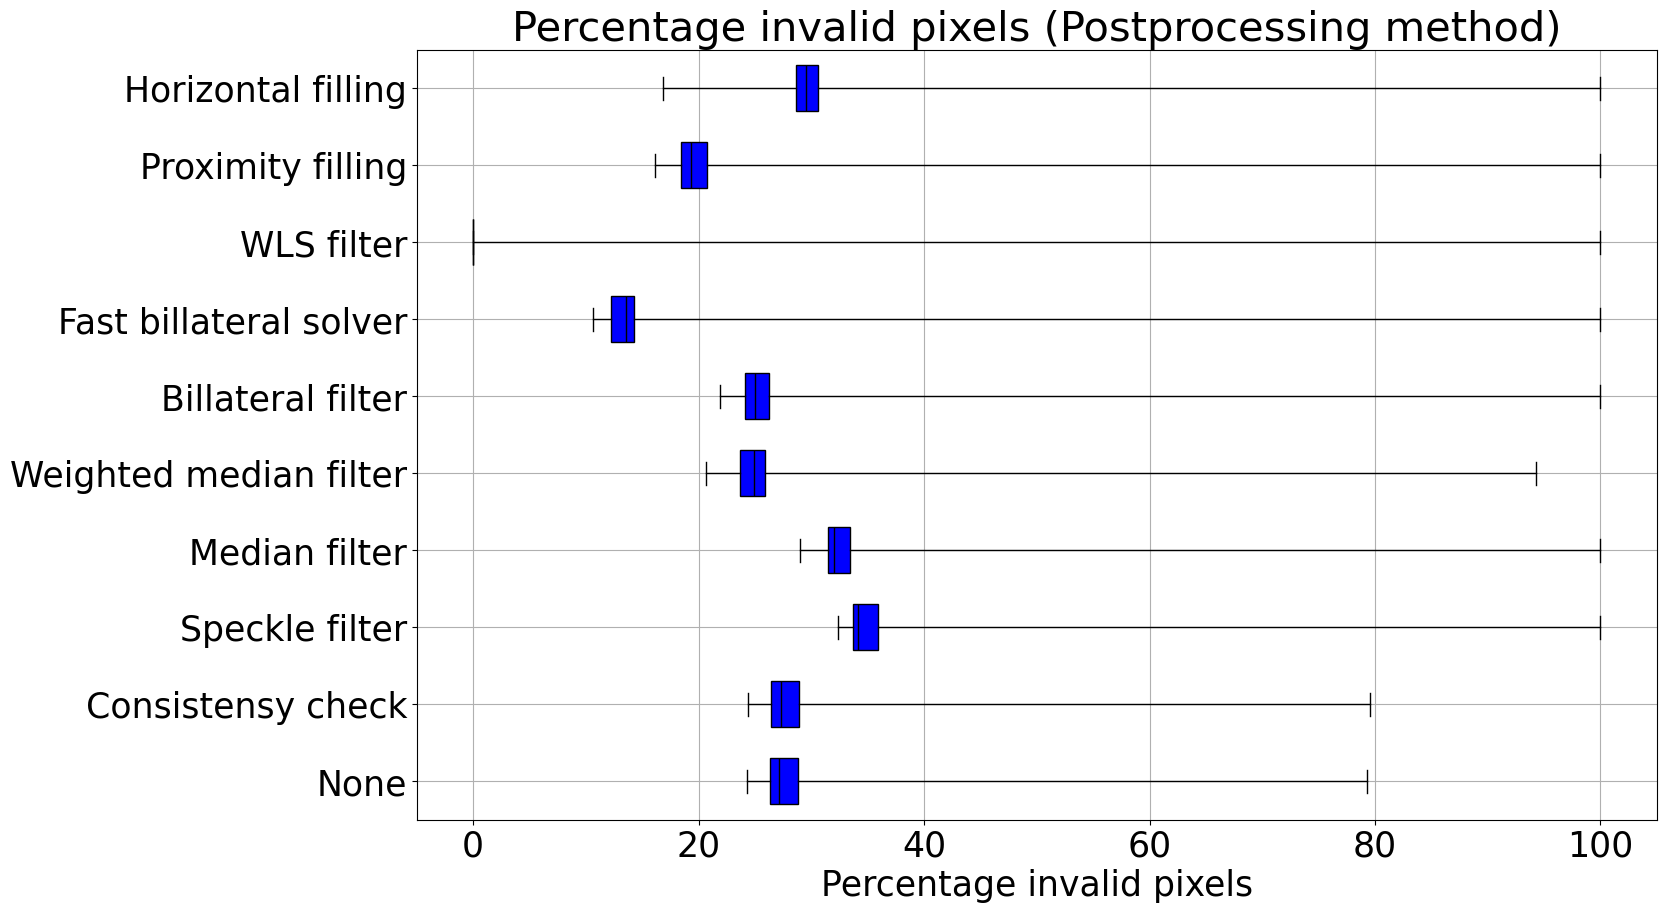

Consistensy check
Quantiles: 
[ 83.5  96.5 101.5]
Speckle filter
Quantiles: 
[7. 7. 7.]
Median filter
Quantiles: 
[21. 21. 22.]
Weighted median filter
Quantiles: 
[877.5 900.5 910. ]
Billateral filter
Quantiles: 
[92. 92. 93.]
Fast billateral solver
Quantiles: 
[250. 263. 274.]
WLS filter
Quantiles: 
[91.25 94.   95.  ]
Proximity filling
Quantiles: 
[239.   244.   252.75]
Horizontal filling
Quantiles: 
[54. 54. 54.]


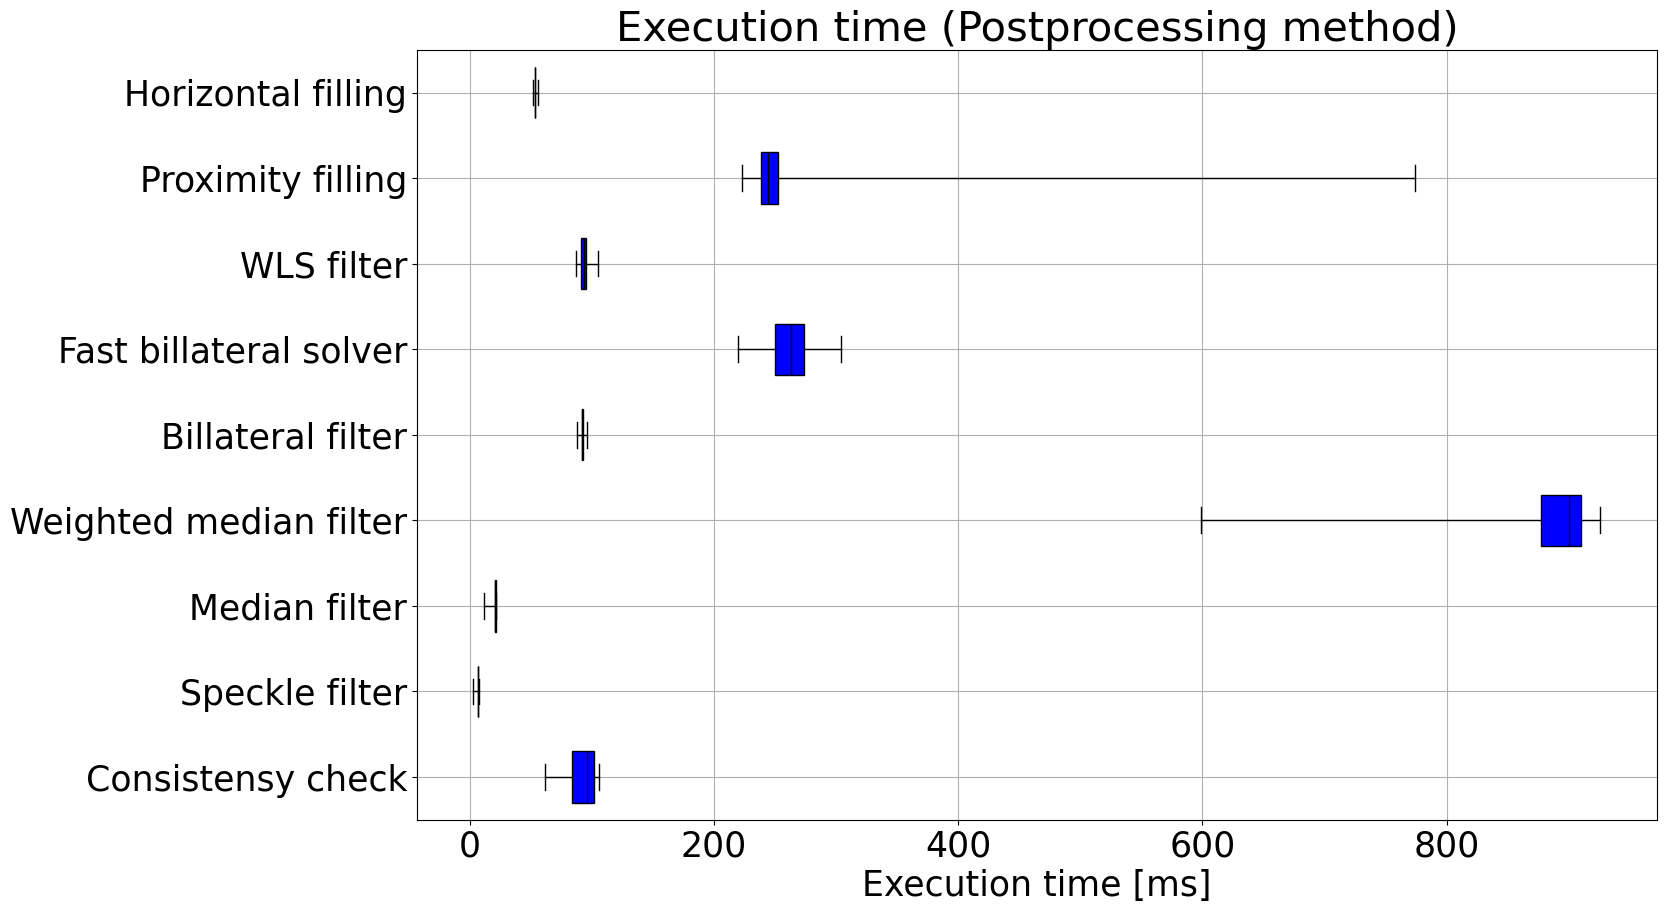

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import statistics
import seaborn as sns
import pandas as pd


# Show boxplots
colors = ['b']
environments = [""]
show_double_grouped_boxplots(environments,settings_single[:10], [single_hole_counts[:10]], colors, '', 'Holes detected','Noise-based holes detected (Postprocessing method)',True,"../../Data/Graphs/Disparity/Postprocessing/post_holes_detected.png")
show_double_grouped_boxplots(environments,settings_single[:10], [single_invalid_percentages[:10]], colors, '', 'Percentage invalid pixels','Percentage invalid pixels (Postprocessing method)',True,"../../Data/Graphs/Disparity/Postprocessing/post_invalid_percentage.png")
#show_double_grouped_boxplots(environments,settings_single[:10], [single_incomplete_count[:10]], colors, '', 'Incomplete map distribution','Incomplete map distribution (Postprocessing setup)',True,"../Data/Graphs/Disparity/Postprocessing/post_speckle_percentage.png")
#show_double_grouped_boxplots(environments,settings_single[:10], [single_consistensy_level[:10]], colors, '', 'Consistensy level','Consistensy (Postprocessing setup)',True,"../Data/Graphs/Disparity/Postprocessing/post_incomplete.png")
show_double_grouped_boxplots(environments,settings_single[1:10], [single_execution_time[1:10]], colors, '', 'Execution time [ms]','Execution time (Postprocessing method)',True,"../../Data/Graphs/Disparity/Postprocessing/post_execution_time.png")


Weighted median filter is way too slow for pseudo "real-time" implementations.
Consistensy checks are also quite slow.
Both consistensy checks and speckle filtering is included in SGBM and is in this case added as another external version.
Weighted median filter gave the best looking results but at the cost of sometimes removing speckles that are actually apart of the structure.
Weighted median filter also results in the lowest amount of invalid pixels as well as holes, which suport the visual inspection of it looking the best.




Consistensy and weighted median
Quantiles: 
[14.   18.   21.75]
Consistensy and speckle
Quantiles: 
[282.5  296.   312.25]
Weighted median and speckle
Quantiles: 
[11.25 14.5  17.  ]
All
Quantiles: 
[11.25 14.   17.  ]


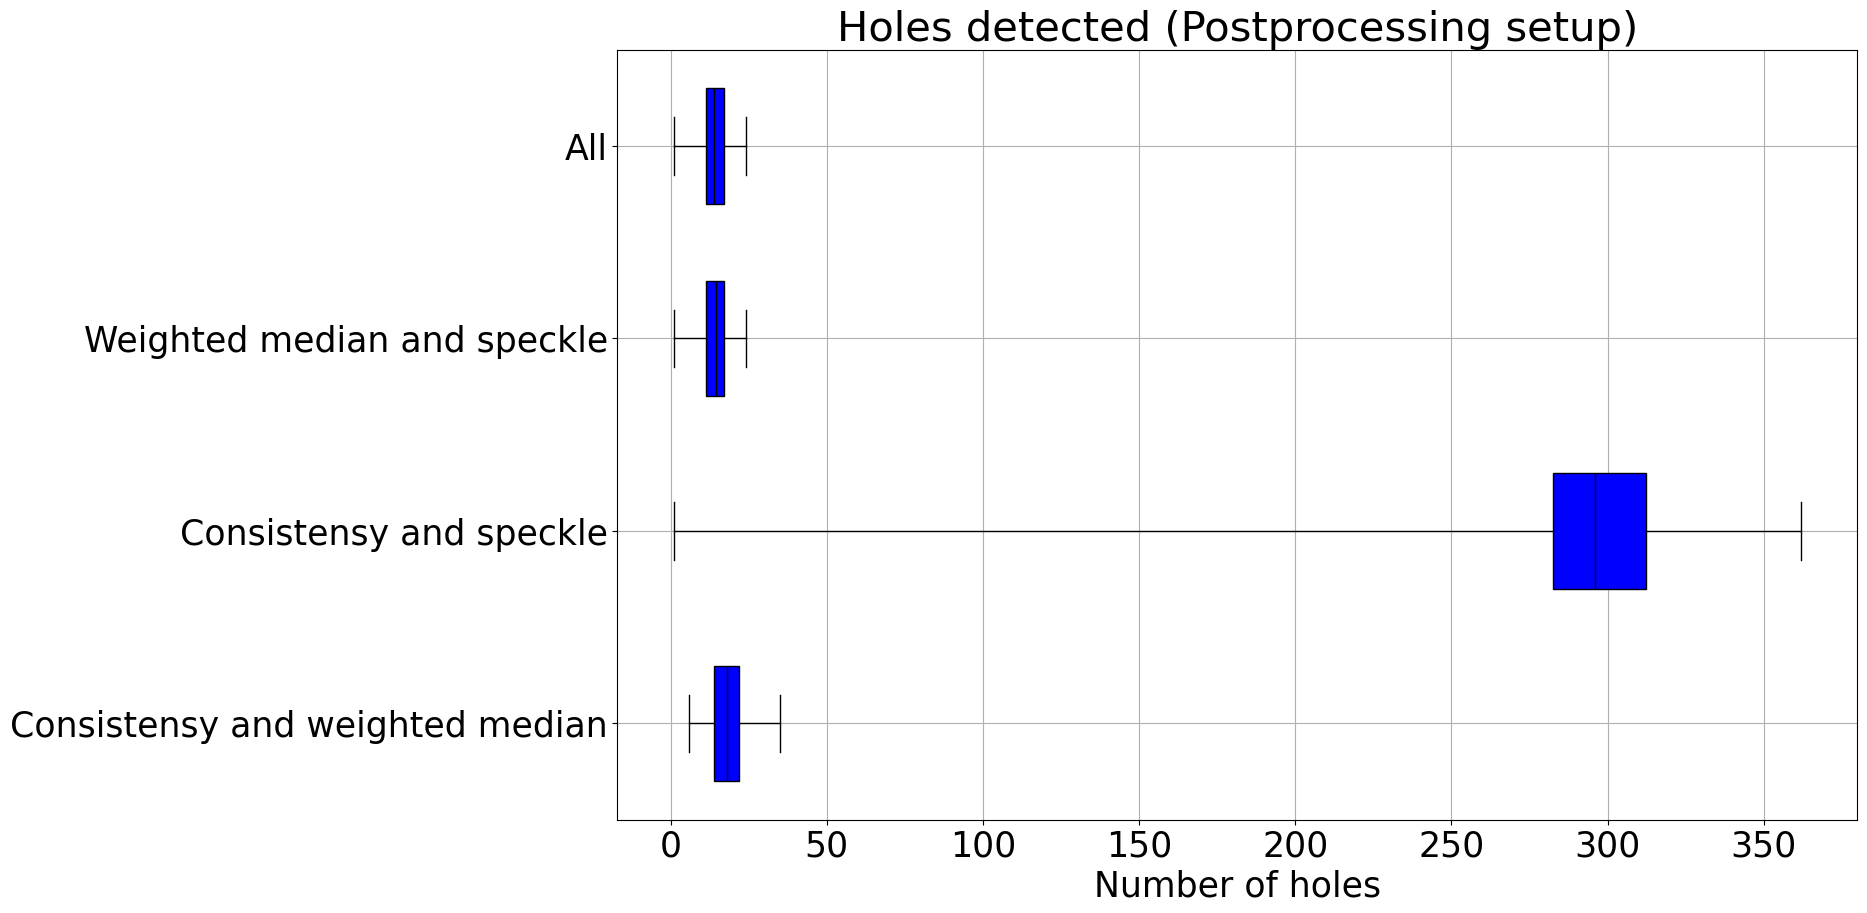

Consistensy and weighted median
Quantiles: 
[23.78405  25.06275  26.005575]
Consistensy and speckle
Quantiles: 
[33.8092 34.3804 36.2679]
Weighted median and speckle
Quantiles: 
[29.76775 30.6271  31.43765]
All
Quantiles: 
[30.253675 30.69855  31.47875 ]


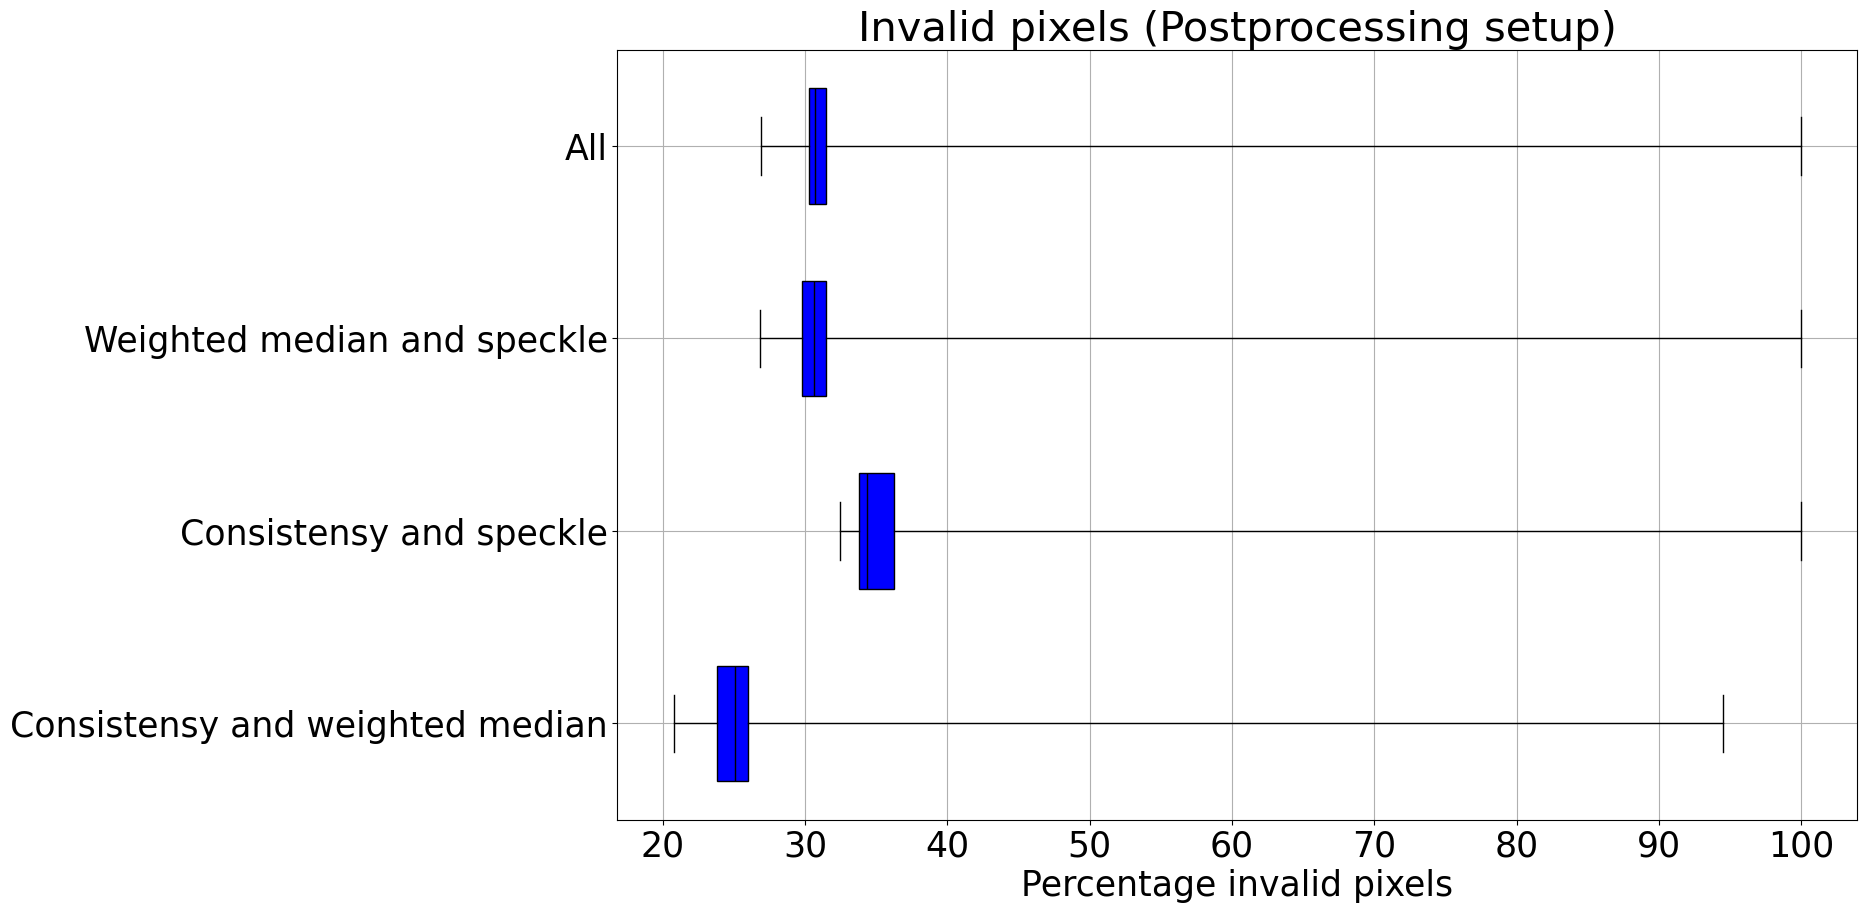

Consistensy and weighted median
Quantiles: 
[0.  0.  0.5]
Consistensy and speckle
Quantiles: 
[0.    0.    0.375]
Weighted median and speckle
Quantiles: 
[0.  0.  0.5]
All
Quantiles: 
[0.5 0.5 0.5]


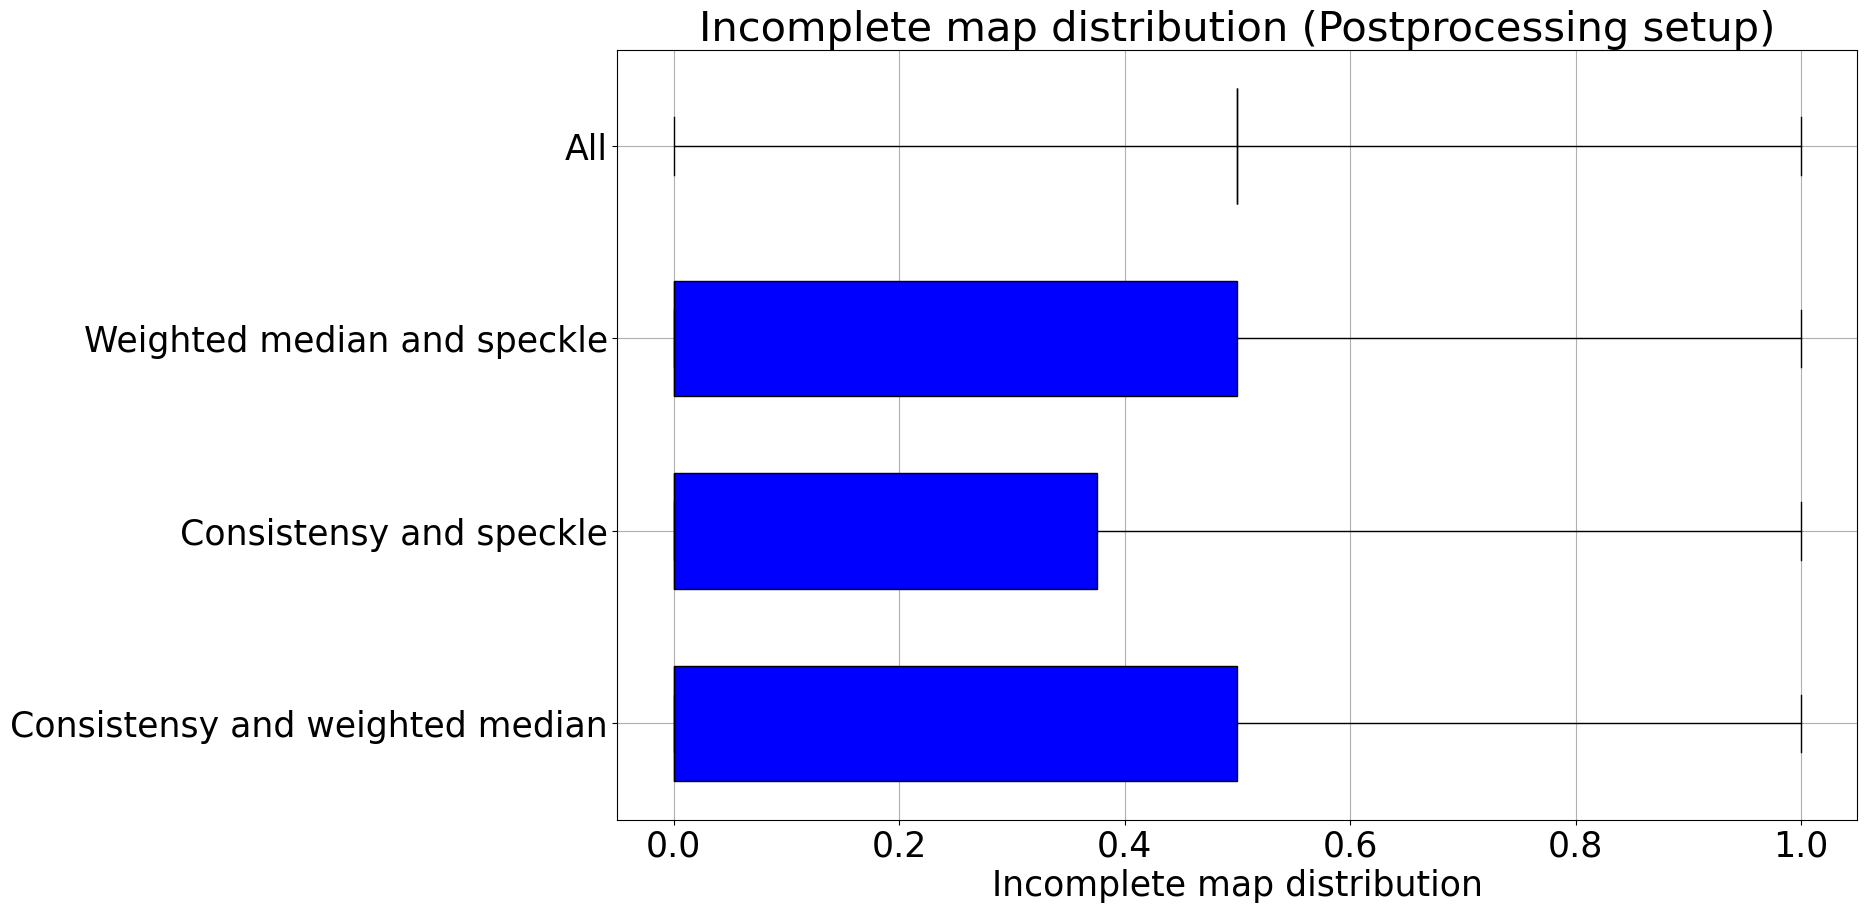

Consistensy and weighted median
Quantiles: 
[100. 100. 100.]
Consistensy and speckle
Quantiles: 
[70. 70. 70.]
Weighted median and speckle
Quantiles: 
[100. 100. 100.]
All
Quantiles: 
[90. 95. 95.]


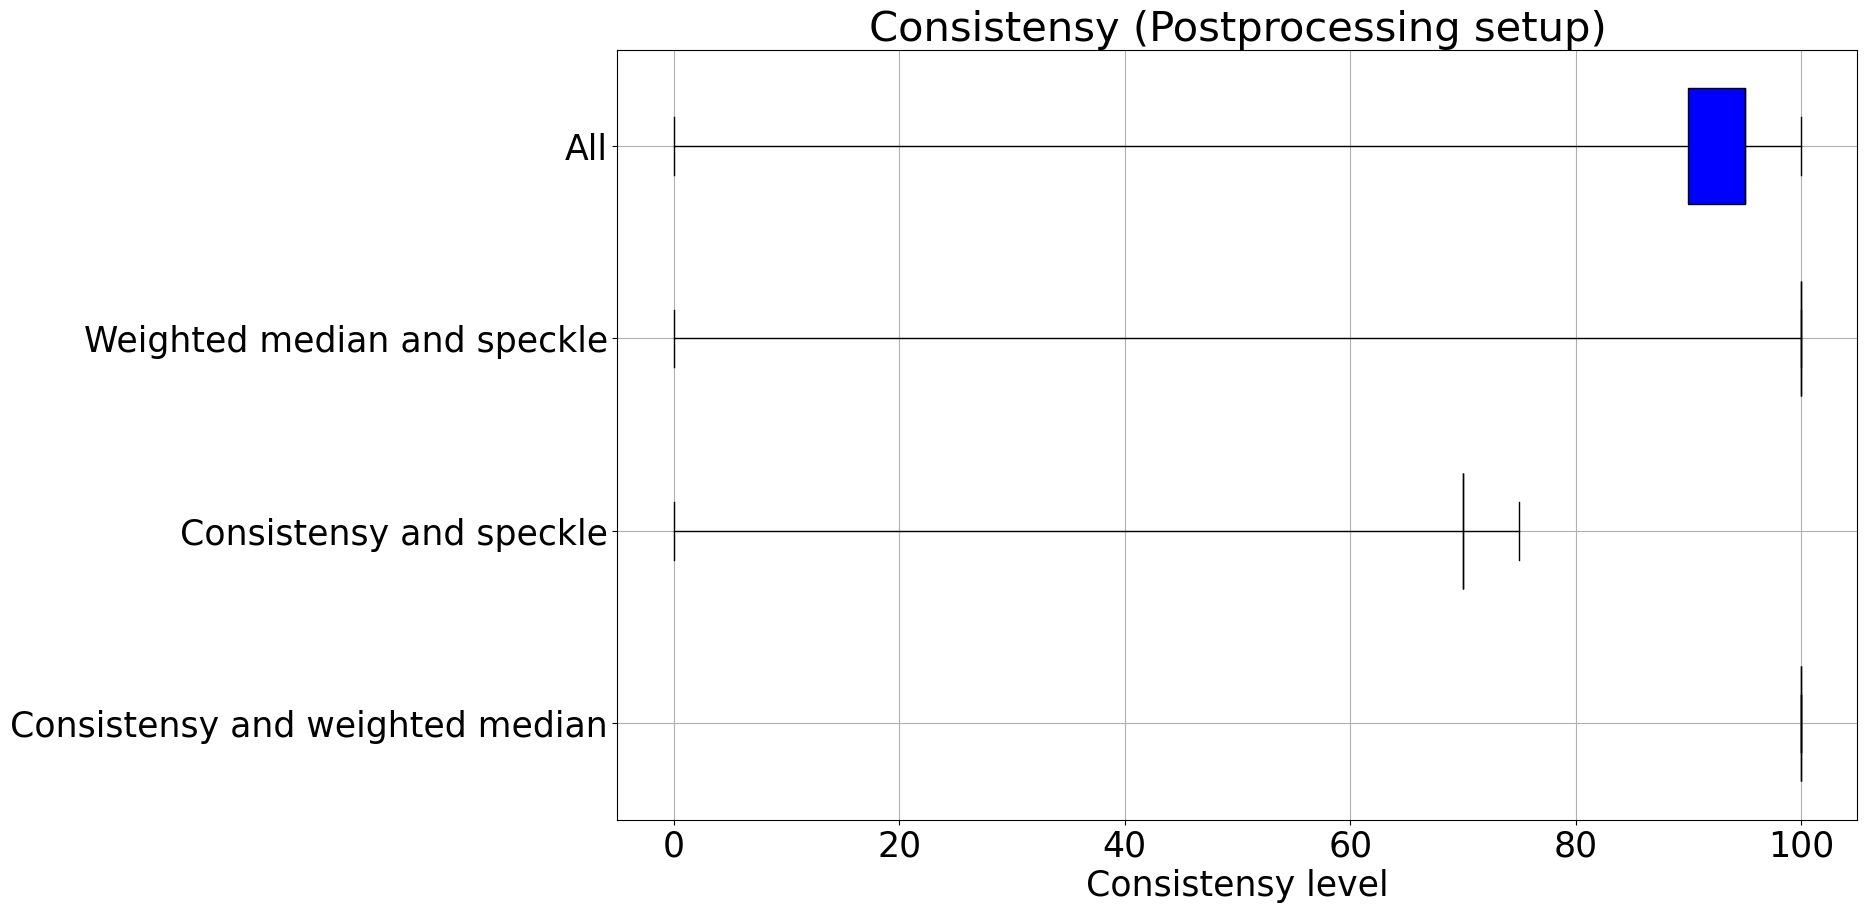

Consistensy and weighted median
Quantiles: 
[954.75 985.   997.75]
Consistensy and speckle
Quantiles: 
[68.   69.   70.75]
Weighted median and speckle
Quantiles: 
[898.25 919.5  929.75]
All
Quantiles: 
[962.75 983.   993.75]


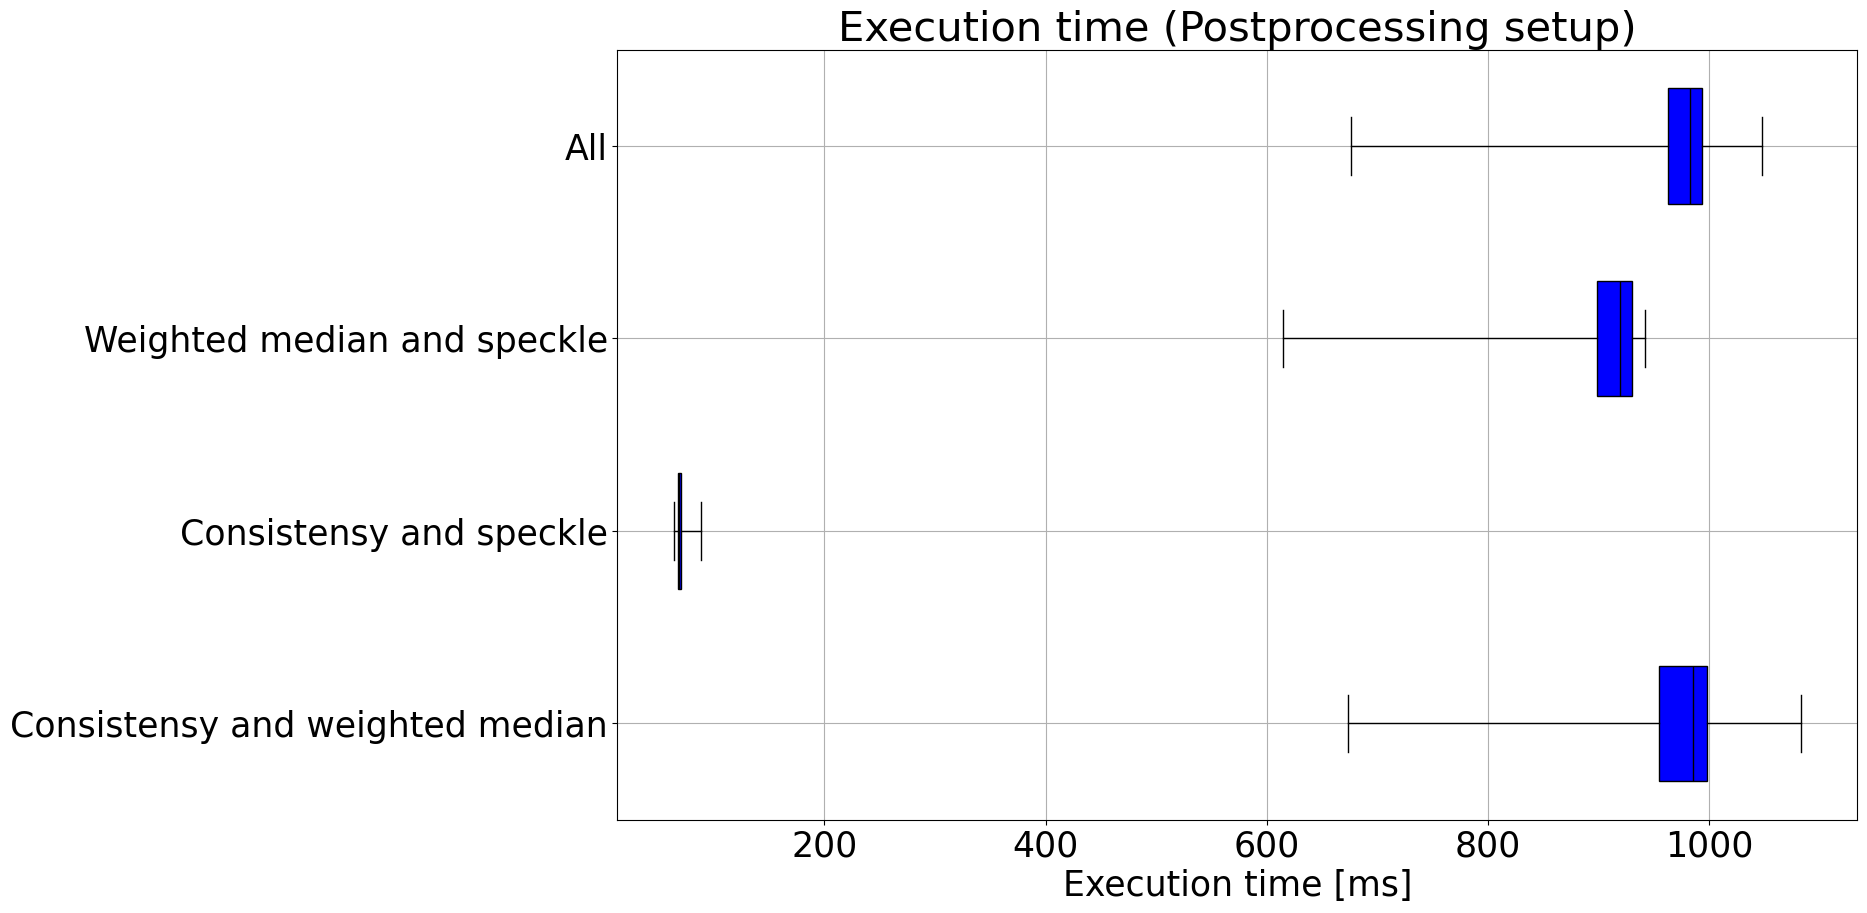

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import statistics
import seaborn as sns
import pandas as pd


# Show boxplots
colors = ['b']
environments = [""]
show_double_grouped_boxplots(environments,settings_combined, [combined_hole_counts], colors, '', 'Number of holes','Holes detected (Postprocessing setup)',True,"../../Data/Graphs/Disparity/Postprocessing/comb_post_holes_detected.png")
show_double_grouped_boxplots(environments,settings_combined, [combined_invalid_percentages], colors, '', 'Percentage invalid pixels','Invalid pixels (Postprocessing setup)',True,"../../Data/Graphs/Disparity/Postprocessing/comb_post_invalid_percentage.png")
show_double_grouped_boxplots(environments,settings_combined, [combined_incomplete_count], colors, '', 'Incomplete map distribution','Incomplete map distribution (Postprocessing setup)',True,"../../Data/Graphs/Disparity/Postprocessing/comb_post_speckle_percentage.png")
show_double_grouped_boxplots(environments,settings_combined, [combined_consistensy_level], colors, '', 'Consistensy level','Consistensy (Postprocessing setup)',True,"../../Data/Graphs/Disparity/Postprocessing/comb_post_incomplete.png")
show_double_grouped_boxplots(environments,settings_combined, [combined_execution_time], colors, '', 'Execution time [ms]','Execution time (Postprocessing setup)',True,"../../Data/Graphs/Disparity/Postprocessing/comb_post_execution_time.png")
